# Week 4 Challenge

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from concurrent.futures import ThreadPoolExecutor

C:\Users\SHOLAY\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def read_data(data):
    return pd.read_csv(data, parse_dates= ['date'], index_col= ['date'], dtype= {'browser': 'category', 'experiment': 'category'})

## Loading the dataset

In [3]:
with ThreadPoolExecutor(max_workers= 2) as executor:
    future= executor.submit(read_data, data= "AdSmartABdata.csv")
    data= future.result()

In [4]:
data.head()

,auction_id,experiment,hour,device_make,platform_os,browser,yes,no
date,,,,,,,,
2020-07-10,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,8,Generic Smartphone,6,Chrome Mobile,0,0
2020-07-07,000eabc5-17ce-4137-8efe-44734d914446,exposed,10,Generic Smartphone,6,Chrome Mobile,0,0
2020-07-05,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2,E5823,6,Chrome Mobile WebView,0,1
2020-07-03,00187412-2932-4542-a8ef-3633901c98d9,control,15,Samsung SM-A705FN,6,Facebook,0,0
2020-07-03,001a7785-d3fe-4e11-a344-c8735acacc2c,control,15,Generic Smartphone,6,Chrome Mobile,0,0


In [5]:
data.tail()

,auction_id,experiment,hour,device_make,platform_os,browser,yes,no
date,,,,,,,,
2020-07-05,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,7,Generic Smartphone,6,Chrome Mobile,0,0
2020-07-03,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,15,Generic Smartphone,6,Chrome Mobile,0,0
2020-07-04,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,9,Generic Smartphone,6,Chrome Mobile,0,0
2020-07-05,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,15,Samsung SM-A515F,6,Samsung Internet,0,0
2020-07-10,fffbb9ff-568a-41a5-a0c3-6866592f80d8,control,14,Samsung SM-G960F,6,Facebook,0,0


## Data Overview

In [6]:
data.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8077 entries, 2020-07-10 to 2020-07-10
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   auction_id   8077 non-null   object  
 1   experiment   8077 non-null   category
 2   hour         8077 non-null   int64   
 3   device_make  8077 non-null   object  
 4   platform_os  8077 non-null   int64   
 5   browser      8077 non-null   category
 6   yes          8077 non-null   int64   
 7   no           8077 non-null   int64   
dtypes: category(2), int64(4), object(2)
memory usage: 1.6 MB


# Data description

In [7]:
data.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


# There are three categorical variables in the above datset:
* experiment
* device_make
* browser

## Experiment has two categories - exposed and control group.

## Control Group: users who have been shown a dummy advertisement.

Exposed Group: users who have been shown a creative, an online interactive advertisement, with the SmartAd brand.

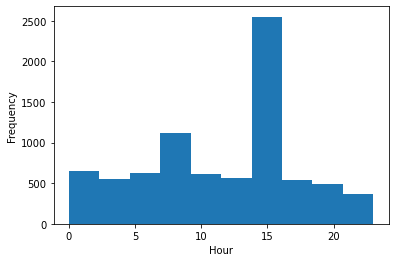

In [8]:
data['hour'].plot.hist()
plt.xlabel('Hour');

### From the above overview of the Hour's column, it could be noticed that most of the Ads were shown in the 15hrs of the day.

In [9]:
data['platform_os'].unique()

array([6, 5, 7], dtype=int64)

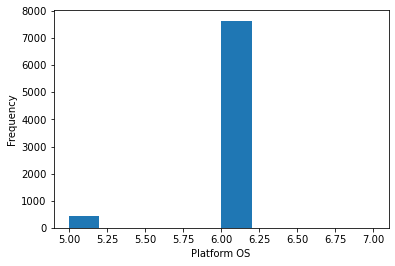

In [10]:
data['platform_os'].plot.hist()
plt.xlabel('Platform OS');

### The id of the OS the user has is between 5 - 7

### Online Users in both ```exposed``` and ```control```

In [11]:
data.query('experiment == "exposed"').head()

,auction_id,experiment,hour,device_make,platform_os,browser,yes,no
date,,,,,,,,
2020-07-10,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,8,Generic Smartphone,6,Chrome Mobile,0,0
2020-07-07,000eabc5-17ce-4137-8efe-44734d914446,exposed,10,Generic Smartphone,6,Chrome Mobile,0,0
2020-07-05,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2,E5823,6,Chrome Mobile WebView,0,1
2020-07-04,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
2020-07-06,006b9c6e-5f5d-4385-a811-ff20a24b30ac,exposed,8,Samsung SM-G973F,6,Chrome Mobile WebView,0,0


In [12]:
data.query('experiment == "control"').head()

,auction_id,experiment,hour,device_make,platform_os,browser,yes,no
date,,,,,,,,
2020-07-03,00187412-2932-4542-a8ef-3633901c98d9,control,15,Samsung SM-A705FN,6,Facebook,0,0
2020-07-03,001a7785-d3fe-4e11-a344-c8735acacc2c,control,15,Generic Smartphone,6,Chrome Mobile,0,0
2020-07-03,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,15,Samsung SM-G960F,6,Facebook,0,0
2020-07-03,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,15,Generic Smartphone,6,Chrome Mobile,0,0
2020-07-09,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,5,Samsung SM-G973F,6,Facebook,0,0


## Function to retrieve data using pivot table

In [13]:
def pivot_exp(data, index, values= ['yes', 'no'], agg= 'sum', margin= True):
    return data.pivot_table(index= index, values= values, aggfunc= 'sum', margins= margin)    

In [14]:
# difference between control and exposed experiment
cediff= pivot_exp(data, index= 'experiment')
cediff

,no,yes
experiment,,
control,322,264
exposed,349,308
All,671,572


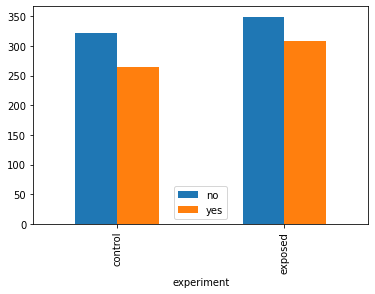

In [15]:
cediff.iloc[:2, :].plot.bar();

### From above visual, it could be noticed that the rate of ```No``` for both the ```Control``` and ```exposed``` is much more than that of ```Yes```

Text(0.5, 1.0, 'Top 10 device used to used to receive the BIO questionaaire')

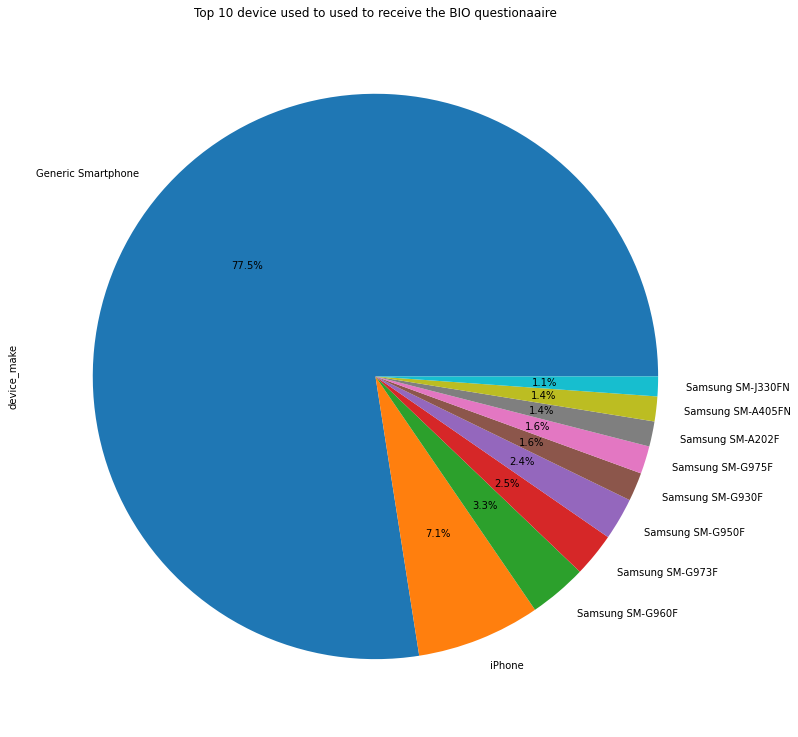

In [16]:
data['device_make'].value_counts().head(10).plot.pie(figsize= (21, 13), autopct='%1.1f%%')
plt.title("Top 10 device used to used to receive the BIO questionaaire")

Text(0.5, 1.0, 'Top 10 device used to used to receive the BIO questionaaire')

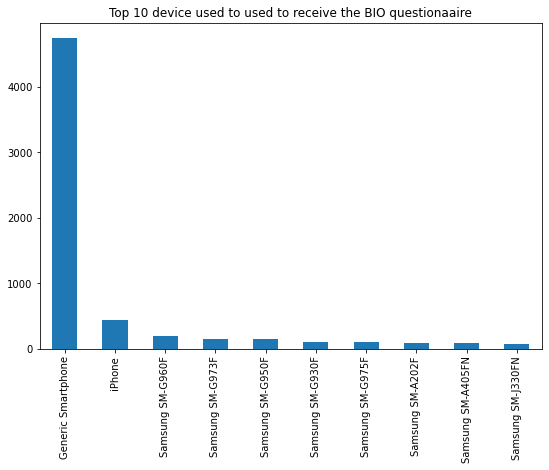

In [17]:
data['device_make'].value_counts().head(10).plot.bar(figsize= (9, 6))
plt.title("Top 10 device used to used to receive the BIO questionaaire")

### We see from this bar plot that $Generic Smartphone$ has the highest number of counts in the device_make column. It means that most people used generic phones to fill the questionnaire.

In [18]:
# The browser user used for the Bio
browser_exp= pivot_exp(data, index= 'browser', margin= False)
browser_exp

,no,yes
browser,,
Android,0,0
Chrome,1,1
Chrome Mobile,381,314
Chrome Mobile WebView,111,116
Chrome Mobile iOS,0,1
Edge Mobile,0,0
Facebook,87,69
Firefox Mobile,0,0
Mobile Safari,10,4


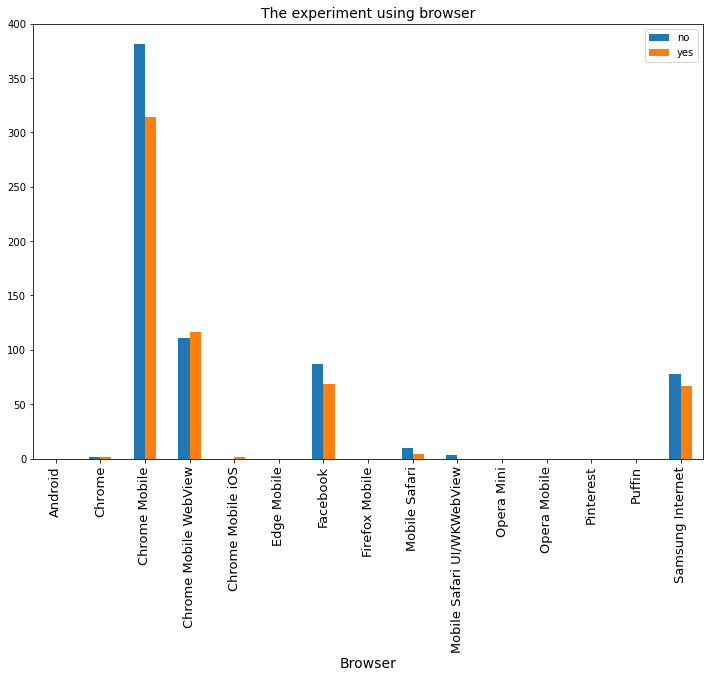

In [19]:
browser_exp.plot.bar(figsize= (12, 8)).set_title('The experiment using browser', fontsize= 14)
plt.xticks(fontsize= 13)
plt.xlabel('Browser', fontsize= 14);

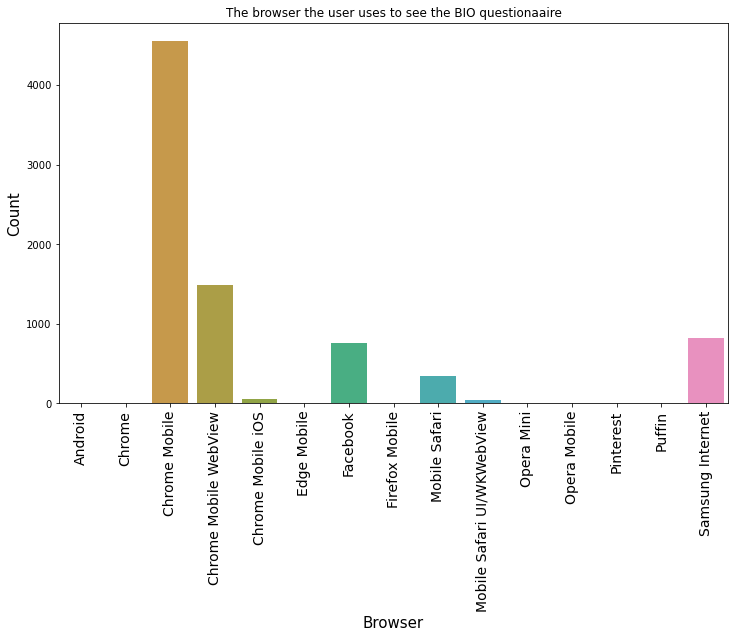

In [20]:
plt.figure(figsize= (12, 7))
sns.countplot(data['browser'].sort_values())
plt.xticks(rotation= 90, fontsize= 14)
plt.xlabel('Browser', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.title('The browser the user uses to see the BIO questionaaire');

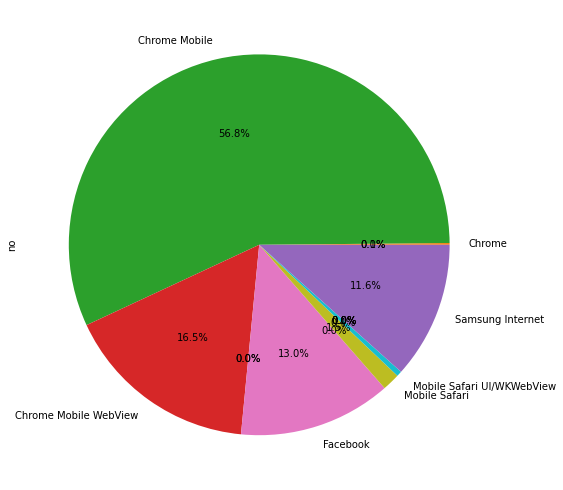

In [21]:
browser_exp.iloc[:, 0].plot.pie(figsize= (8, 10), autopct='%1.1f%%')
plt.tight_layout()

### Most of the users use ```Chrome Mobile```, ```Chrome Mobile WebView``` and ```Samsung Internet``` to see the BIO questionnaire

In [22]:
training_data= data.iloc[:, 1:].copy()

In [23]:
training_data.head()

,experiment,hour,device_make,platform_os,browser,yes,no
date,,,,,,,
2020-07-10,exposed,8,Generic Smartphone,6,Chrome Mobile,0,0
2020-07-07,exposed,10,Generic Smartphone,6,Chrome Mobile,0,0
2020-07-05,exposed,2,E5823,6,Chrome Mobile WebView,0,1
2020-07-03,control,15,Samsung SM-A705FN,6,Facebook,0,0
2020-07-03,control,15,Generic Smartphone,6,Chrome Mobile,0,0


# Machine learning section

## Transforming the categorical columns using the ```SKLEARN``` standard library and PANDAS ```get_dummies``` method

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [25]:
training_data['experiment']= pd.get_dummies(training_data['experiment'], drop_first= True)

In [26]:
le= LabelEncoder()
le1= LabelEncoder()

In [27]:
training_data['device_make']= le.fit_transform(training_data['device_make'])
training_data['browser']= le1.fit_transform(training_data['browser'])

In [28]:
training_data.head()

,experiment,hour,device_make,platform_os,browser,yes,no
date,,,,,,,
2020-07-10,1,8,46,6,2,0,0
2020-07-07,1,10,46,6,2,0,0
2020-07-05,1,2,29,6,3,0,1
2020-07-03,0,15,137,6,6,0,0
2020-07-03,0,15,46,6,2,0,0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(training_data.iloc[:, :5], training_data.iloc[:, 5:], test_size=0.3)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## Importing the Stratified Kfold and Cross validation score from the sklearn library

In [31]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [32]:
lg= LogisticRegression(solver= 'lbfgs') # Logistic regression model
dtc= DecisionTreeClassifier() # Decision tree model

## Yes section

### Logistic regression

In [33]:
lg.fit(X_train, y_train.iloc[:, 0])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
dtc.fit(X_train, y_train.iloc[:, 0])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [35]:
yes_pred= lg.predict(X_test)

In [36]:
from sklearn import metrics as ms

In [37]:
y_test

,yes,no
date,,
2020-07-04,0,0
2020-07-03,0,0
2020-07-08,0,0
2020-07-09,0,0
2020-07-09,1,0
...,...,...
2020-07-03,0,0
2020-07-05,0,0
2020-07-09,0,0


#### Logistic accuracy score

In [38]:
lg.score(X_test, y_test.iloc[:, :1])

0.9306930693069307

## The accuracy score by splitting the dataset into 5 folds 

In [39]:
cross_val_score(LogisticRegression(solver= 'lbfgs'), training_data.iloc[:, :5],training_data.iloc[:, 5], cv= 5)

array([0.92883663, 0.92883663, 0.92941176, 0.92941176, 0.92941176])

In [40]:
yes_predD= dtc.predict(X_test)

#### Decision tree accuracy score

In [41]:
dtc.score(X_test, y_test.iloc[:, :1])

0.9108910891089109

## The accuracy score by splitting the dataset into 5 folds 

In [42]:
cross_val_score(DecisionTreeClassifier(), training_data.iloc[:, :5],training_data.iloc[:, 5], cv= 5)

array([0.90779703, 0.90903465, 0.91145511, 0.90216718, 0.90835913])

In [43]:
lgN= LogisticRegression(solver= 'lbfgs') # Logistic regression model
dtcN= DecisionTreeClassifier() # Decision tree model

## No section

### Logistic regression

In [44]:
lgN.fit(X_train, y_train.iloc[:, 1])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Logistic accuracy score

In [45]:
lgN.score(X_test, y_test.iloc[:, 1])

0.9170792079207921

## The accuracy score by splitting the dataset into 5 folds 

In [46]:
cross_val_score(LogisticRegression(solver= 'lbfgs'), training_data.iloc[:, :5],training_data.iloc[:, 6], cv= 5)

array([0.91651206, 0.91702786, 0.91702786, 0.91702786, 0.91702786])

### Decision tree

In [47]:
dtcN.fit(X_train, y_train.iloc[:, 1])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Decision tree accuracy score

In [48]:
dtcN.score(X_test, y_test.iloc[:, 1])

0.8915016501650165

## The accuracy score by splitting the dataset into 5 folds 

In [49]:
cross_val_score(DecisionTreeClassifier(), training_data.iloc[:, :5],training_data.iloc[:, 6], cv= 5)

array([0.89363018, 0.89226006, 0.89473684, 0.89164087, 0.89721362])

# From the above predictions it could be noticed that Logistic regression model is performing excellent for the prediction of ```Yes``` and ```No```

## Data overview after prediction

In [50]:
training_data['Logistic predicted yes'] = lg.predict(training_data.iloc[:, :5])

In [51]:
training_data['Decision_tree predicted yes'] = dtc.predict(training_data.iloc[:, :5])

In [52]:
training_data['Logistic predicted no']= lgN.predict(training_data.iloc[:, :5])

In [53]:
training_data['Decision tree predicted no']= dtcN.predict(training_data.iloc[:, :5])

In [54]:
training_data.head()

,experiment,hour,device_make,platform_os,browser,yes,no,Logistic predicted yes,Decision_tree predicted yes,Logistic predicted no,Decision tree predicted no
date,,,,,,,,,,,
2020-07-10,1,8,46,6,2,0,0,0,0,0,0
2020-07-07,1,10,46,6,2,0,0,0,0,0,0
2020-07-05,1,2,29,6,3,0,1,0,0,0,1
2020-07-03,0,15,137,6,6,0,0,0,0,0,0
2020-07-03,0,15,46,6,2,0,0,0,0,0,0


In [55]:
training_data.describe()

,experiment,hour,device_make,platform_os,browser,yes,no,Logistic predicted yes,Decision_tree predicted yes,Logistic predicted no,Decision tree predicted no
count,8077.000000,8077.000000,8077.000000,8077.000000,8077.000000,8077.000000,8077.000000,8077.0,8077.000000,8077.0,8077.000000
mean,0.495976,11.615080,93.095456,5.947134,4.097809,0.070818,0.083075,0.0,0.021047,0.0,0.024019
std,0.500015,5.734879,70.310654,0.224333,3.725419,0.256537,0.276013,0.0,0.143551,0.0,0.153117
min,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,0.000000,7.000000,46.000000,6.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
50%,0.000000,13.000000,46.000000,6.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
75%,1.000000,15.000000,141.000000,6.000000,4.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
max,1.000000,23.000000,269.000000,7.000000,14.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000
